In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

C:\Users\aruni\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


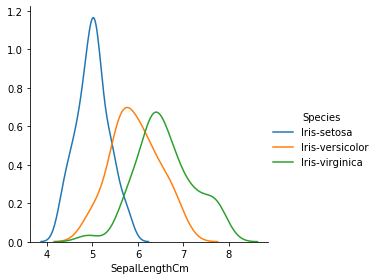

In [6]:
sns.FacetGrid(df, hue="Species", size = 4).map(sns.kdeplot, "SepalLengthCm").add_legend()

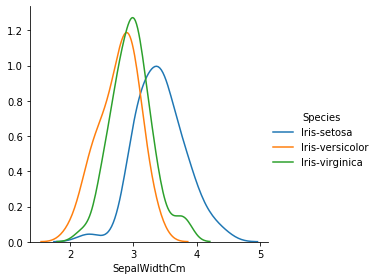

In [7]:
sns.FacetGrid(df, hue="Species", size = 4).map(sns.kdeplot, "SepalWidthCm").add_legend()

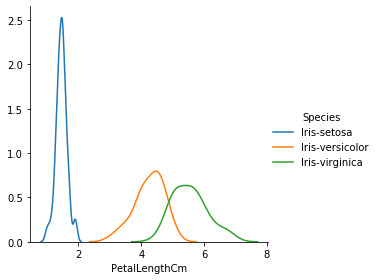

In [8]:
sns.FacetGrid(df, hue="Species", size = 4).map(sns.kdeplot, "PetalLengthCm").add_legend()

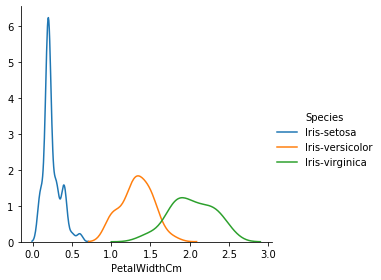

In [9]:
sns.FacetGrid(df, hue="Species", size = 4).map(sns.kdeplot, "PetalWidthCm").add_legend()

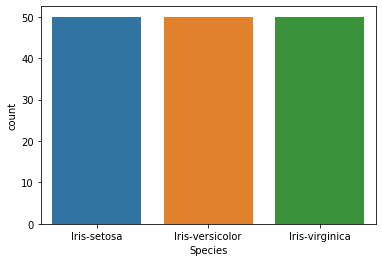

In [10]:
sns.countplot(x="Species", data = df)

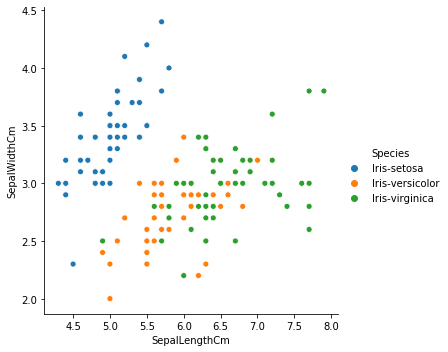

In [11]:
sns.relplot(x="SepalLengthCm", y="SepalWidthCm", data=df, hue='Species')

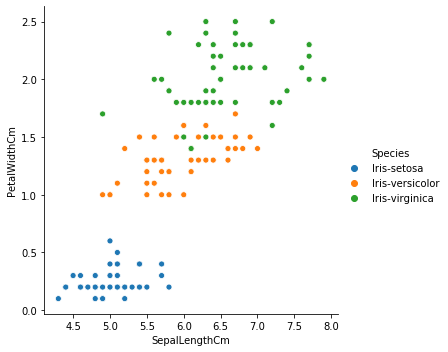

In [12]:
sns.relplot(x="SepalLengthCm", y="PetalWidthCm", data=df, hue='Species')

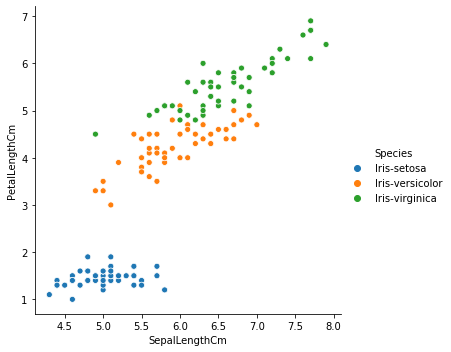

In [13]:
sns.relplot(x="SepalLengthCm", y="PetalLengthCm", data=df, hue='Species')

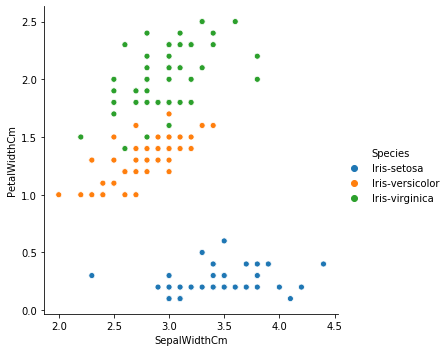

In [14]:
sns.relplot(x="SepalWidthCm", y="PetalWidthCm", data=df, hue='Species')

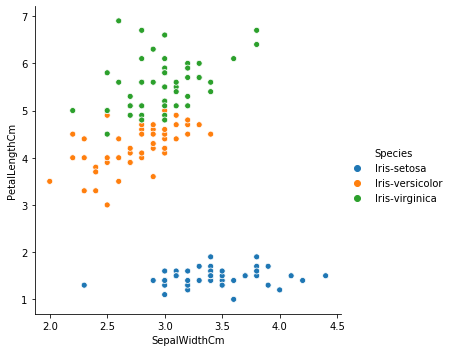

In [15]:
sns.relplot(x="SepalWidthCm", y="PetalLengthCm", data=df, hue='Species')

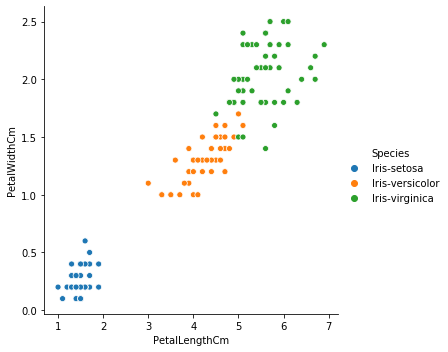

In [16]:
sns.relplot(x="PetalLengthCm", y="PetalWidthCm", data=df, hue='Species')

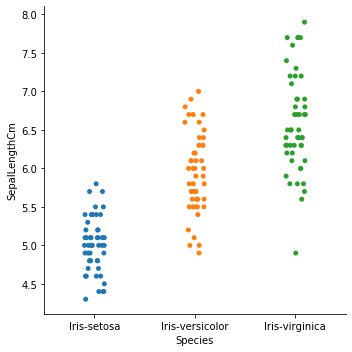

In [17]:
sns.catplot(y ='SepalLengthCm', x = 'Species', data =df)

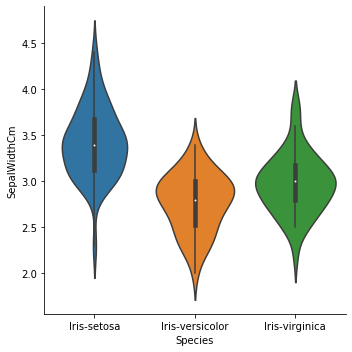

In [18]:
sns.catplot(y ='SepalWidthCm', x = 'Species', data =df, kind  ='violin')

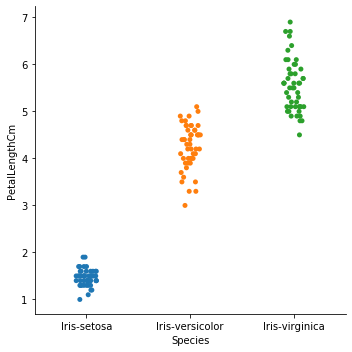

In [19]:
sns.catplot(y ='PetalLengthCm', x = 'Species', data =df, kind = 'strip')

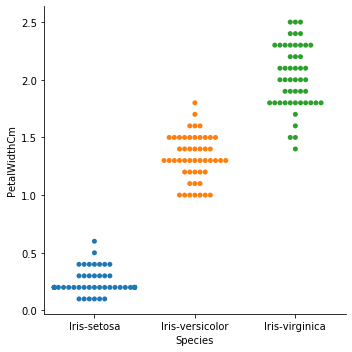

In [20]:
sns.catplot(y ='PetalWidthCm', x = 'Species', data =df, kind = 'swarm')

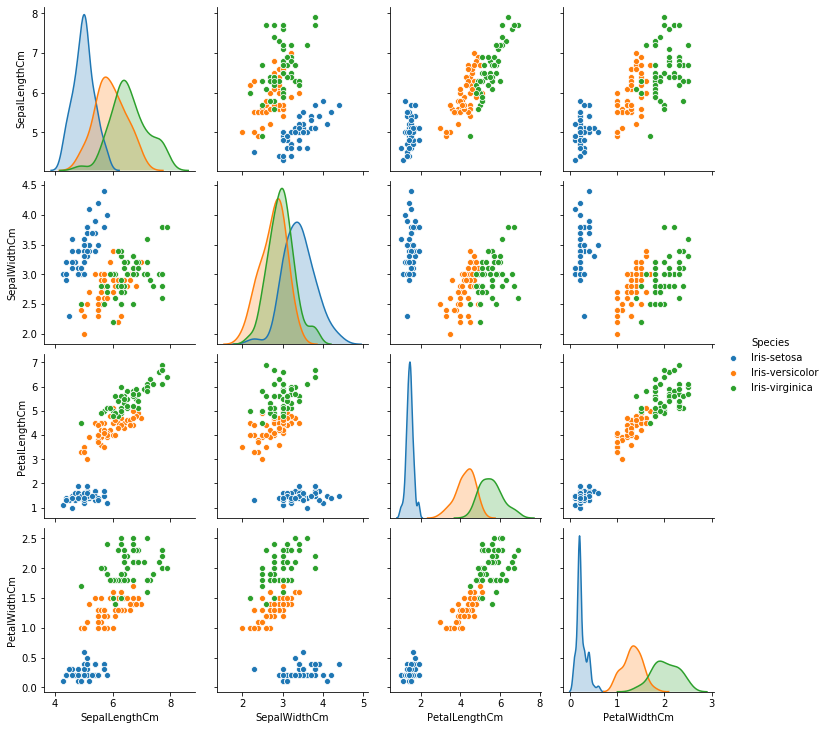

In [21]:
sns.pairplot(df.drop('Id',axis=1), hue='Species')

In [22]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [23]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (112, 4) (112,)
Testing set shape:  (38, 4) (38,)


<h3>1. K- Nearest Neighbors

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [26]:
from sklearn import metrics

In [27]:
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.94736842, 0.94736842, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.97368421, 0.97368421,
       0.97368421, 0.97368421, 0.97368421, 0.92105263, 0.92105263])

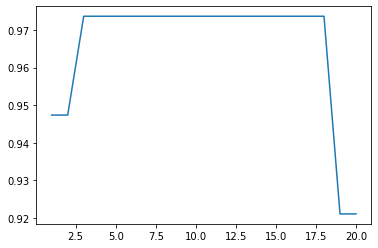

In [28]:
plt.plot(range(1,21),mean_acc)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
grid_params = {'n_neighbors' : [3,5,7,9,11,13,15,17], 
               'weights' : ['uniform','distance'],
               'algorithm' : ['brute','kd_tree','ball_tree'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [31]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [32]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:    6.8s finished


In [33]:
g_res.best_score_

0.9559032716927455

In [34]:
g_res.best_estimator_

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [35]:
g_res.best_params_

{'algorithm': 'brute',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'distance'}

In [36]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [37]:
y_knn = knn.predict(X_test)

In [38]:
metrics.accuracy_score(y_test, y_knn)

0.9736842105263158

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [179]:
scores = cross_val_score(knn, X , y, cv = 5)
scores

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

<h3>2. Support Vector Machines (SVMs)

In [40]:
from sklearn import svm
clf = svm.SVC()

In [41]:
grid_params = { 'C' : [0.01, 0.1, 1 , 10],
                'kernel' : ['linear', 'rbf', 'poly'],
               'gamma' : [0.01, 0.1 , 1 , 10]}

In [42]:
gs = GridSearchCV(clf, grid_params, verbose = 1, cv=3, n_jobs = -1)

In [43]:
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    0.7s finished


In [44]:
g_res.best_score_

0.9556661925082978

In [45]:
g_res.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [46]:
clf = svm.SVC(C = 1, gamma = 0.1, kernel = 'rbf')
clf.fit(X_train, y_train)
y_svm = clf.predict(X_test)

In [47]:
metrics.accuracy_score(y_test, y_svm)

0.9736842105263158

In [48]:
print(classification_report(y_test, y_svm))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [180]:
scores = cross_val_score(clf, X , y, cv = 5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [181]:
np.mean(scores)

0.9800000000000001

<h3>3. Decision Trees

In [182]:
X = df[['PetalLengthCm','PetalWidthCm']]
y = df['Species']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf3 = DecisionTreeClassifier(max_depth = 5, criterion = 'entropy' ,random_state = 42)
clf3

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [185]:
clf3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [186]:
y_hat = clf3.predict(X_train)
y_tree = clf3.predict(X_test)

In [187]:
print('Training set accuracy: ',metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_tree))

Training set accuracy:  0.9732142857142857
Test set accuracy:  1.0


[Text(310.0, 830.5, 'SepalLengthCm <= 2.45\nentropy = 1.583\nsamples = 112\nvalue = [35, 39, 38]\nclass = Iris-versicolor'),
 Text(206.66666666666666, 679.5, 'entropy = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = Iris-setosa'),
 Text(413.3333333333333, 679.5, 'SepalLengthCm <= 4.75\nentropy = 1.0\nsamples = 77\nvalue = [0, 39, 38]\nclass = Iris-versicolor'),
 Text(206.66666666666666, 528.5, 'SepalWidthCm <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(103.33333333333333, 377.5, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(310.0, 377.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(620.0, 528.5, 'SepalLengthCm <= 5.15\nentropy = 0.527\nsamples = 42\nvalue = [0, 5, 37]\nclass = Iris-virginica'),
 Text(516.6666666666666, 377.5, 'SepalWidthCm <= 1.75\nentropy = 0.896\nsamples = 16\nvalue = [0, 5, 11]\nclass = Iris-virginica'),
 Text(310.0, 226.5, 'SepalLengthCm <= 4.95\ne

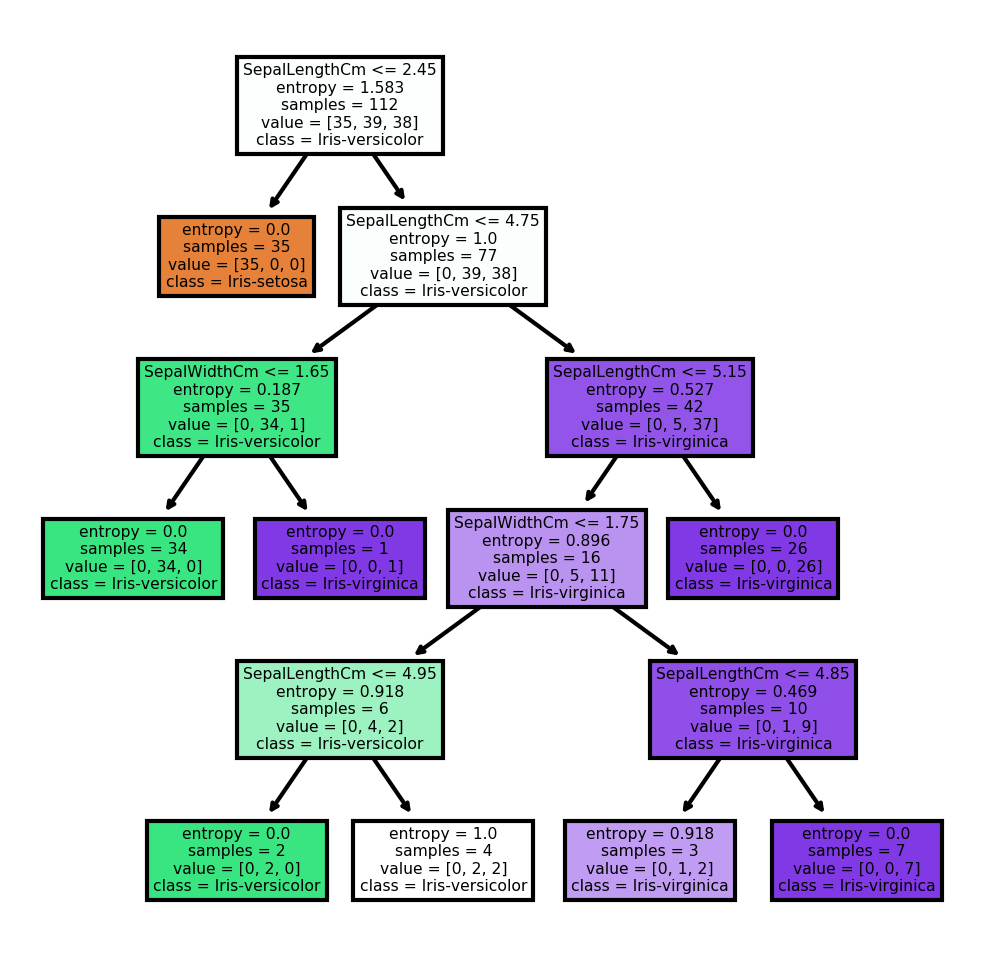

In [188]:

fn=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf3 , feature_names = fn, class_names=cn, filled = True)

In [189]:
clf3.feature_importances_

array([0.93734731, 0.06265269])

In [190]:
grid_params = { 'criterion' : ['gini','entropy'], 'max_depth' : [3,4,5,6]}
gs = GridSearchCV(clf3 , grid_params, verbose = 1, cv=3, n_jobs = -1)
gs.fit(X_train , y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   11.2s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [191]:
gs.best_score_

0.9461830251303937

In [192]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [193]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf3, X , y, cv = 5)
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [194]:
np.mean(scores)

0.9600000000000002